## RUN THE BELOW CODE CELLS TO IMPORT RELEVANT CODE

In [2]:
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

In [3]:
from matplotlib.collections import PolyCollection # extra fancy plotting
from ipywidgets import widgets, fixed # sliders
from IPython.display import display, clear_output
from IonCell import *

In this week's wet lab we will study smooth-muscle contractions of the small intestine or the uterus of rats in an organ bath using a force transducer. We will then investigate how different neurotransmitters, ions and drugs affect the contractions of these muscles. Each group of students will receive either a piece of uterus or intestine, and it will be up to you to figure out which organ you are working with. You will introduce neurotransmitters to simulate natural stimulation of the muscles from the nervous system, and salts (ions) to artifically stimulate the muscles by depolarizing the membrane potential. It is essential that you comprehend how the membrane potential is maintained and changed in response to stimuli to understand how these muscles works and how they can be regulated by the nervous system, which is the focus of this data lab!

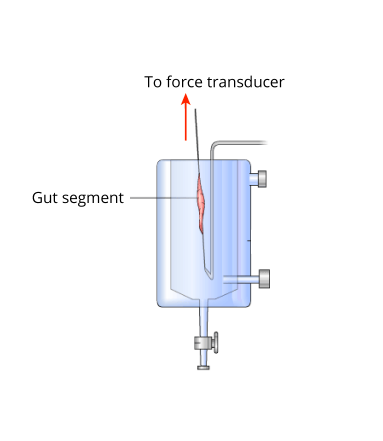
## Learning outcomes
### Biology
1. Membrane Potential
2. Equilibrium Potential
3. Resting Potential
4. Effects of changing ionic concentrations and relating it to permeability
5. Effects of changing permeability
6. Autonomic nervous system and smooth muscle physiology

### Python
1. Creating a function
2. Using a function
3. Observe simulations

## Introduction
In this assignment we will revisit the membrane potential. To this end we shall consider equilibrium potential and resting potential which we can calculate using the Nernst and Goldman-Hodgkin-Katz equations. Finally we change different ion concentrations, as well as the permeability of a cell membrane and observe the consequences this has on the resting potential.

---

### The physics (used to generate simulations)
In an effort to give a more interactive hands-on experience with the above concepts (membrane, equilibrium and resting potential) we have developed some simple molecular dynamics simulations. It is worth noting that these simulations should be digested as illustrations, and not as replicaes of the real phenomenon. Below we give a brief description of the workings of the simulations, and some assosciated restrictions.

We can model ions and their movement in space using Coloumbs Law which essentially says: __*Same charged particles repel eachother and oppositely charged particles attract each other*__ propotional to the inverse squared distance between the particles. 

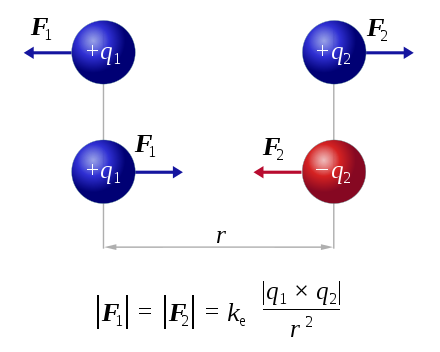
https://en.wikipedia.org/wiki/Coulomb%27s_law

This allows us to calculate the force experienced by a particle from all other particles. If, for example, you are a positive ion with many positive ions to the north of you, you are being pushed in the opposite direction - to the south. 

To go from forces to movement, we can use Newtons second law: F = ma, i.e. that force is equal to the mass times acceleration. Solving for a gives us a = F/m. Often in simulations we are working with dimensionless units. In other words, we ignore the scale of things. Here, we set all particles to have unit mass. This creates an equality in acceleration and force, i.e. F=a. Lastly, we can go from acceleration to velocity and position by integration. 

In these simulations we have made the membrane either permeable or impermeable to ions. In other words, ions can either pass the membrane or they can't.

In a more realistic scenario, the simulations would include diffusion including concentration gradients modelled by gibbs free energy. Moreover, the different ions should have relative different membrane permeability.

---

### Exercise 1 - Equilibrium potential for a single ion
The equilibrium potential for an ion is the electrical potential that arise over the membrane of a cell when **net diffusion** of this ion into the same **EQUALS** the diffusion going out of the cell. For example, the equilibrium potential for potassium is the potential over the cell when potassium is in equilibrium and no other ions are contributing to the electrical potential. Note that in this scenario we only consider **PASSIVE transfort**, no active transport.

To illustrate this we have included a simple simulation of an **impermeable** circular cell. The cell is filled with only one ionic type (e.g. K+) initialised randomly within the cell. Next to the cell and ion simulation we also include the potential induced by the simulation everywhere in space. Finally, we also print the Membrane Potential as measured in a small area around the electrodes. NOTE! the system is dimensionless, so the **UNITS ARE UNSCALED**.

Run the code cell below and use the slider to see how the system evolves in time.

In [4]:
scenario1 = Scenario1()
slider = widgets.interact(scenario1.plot,timepoint=widgets.IntSlider(
    description='Timepoint', min=0, max=2000, step=1))

interactive(children=(IntSlider(value=0, description='Timepoint', max=2000), Output()), _dom_classes=('widget-…

**a)** Describe what you see in the above simulations. Why do the ions move toward the membrane?

        Answer: 

**b)** In this scenario, when the cell has only one type of ion, what is the relationship between the membrane and equilibrium potential?

        Answer: 

**c)** Describe how the membrane potential changes with time. In your description you should include the word "equilibrium".

        Answer: 


Using the Nernst-equation we can calculate the equilibrium potential $E_x$ for a single ion $x$ as,

<!-- Equation labels as ordinary links -->
<div id="eq:nernst"></div>

$$
\begin{equation} \label{eq:nernst} \tag{1}
E_x = \frac{\mathrm{C}}{z}\log_{10}\frac{[x]_{outside}}{[x]_{inside}},
\end{equation}
$$

where
* $\mathrm{C} = 61$mV is a constant

* $z$ is the charge of the ion

* $[x]_{outside}$ is the concentration of ion $x$ outside the cell (mM)

* $[x]_{inside}$ is the concentration of ion $x$ inside the cell (mM)

**Extracellular and intracellular ion concentration:**
<table border="1">
<thead>
<tr><th align="center">      Ion      </th> <th align="center">Extracellular (mM)</th> <th align="center">Intracellular (mM)</th> </tr>
</thead>
<tbody>
<tr><td align="center">   $\mathrm{Na^+}$    </td> <td align="center">   145                    </td> <td align="center">   15                    </td> </tr>
<tr><td align="center">   $\mathrm{K^+}$     </td> <td align="center">   4                      </td> <td align="center">   140                   </td> </tr>
<tr><td align="center">   $\mathrm{Cl^-}$    </td> <td align="center">   120                    </td> <td align="center">   7                     </td> </tr>
<tr><td align="center">   Others              </td> <td align="center">   < 1                    </td> <td align="center">   65                    </td> </tr>
</tbody>
</table>

**d)** Fill in the blanks of the code below to create a python-function for calculating the Nernst potential. Obs! you need to import log10 from a library.

In [ ]:
# import library that has log operator!
def nernst(___, ___, ___):
    C = 61
    E_x = ___
    return E_x

**e)** What is the equilibrium potential for potassium? Use your newly created function and values from the above table to calculate it. When you print out the value, also include the correct unit!

**f)** In what two ways can the equilibrium potential be positive? Hint! Consider the charge and concentrations in the Nernst-equation.

    Answer: 

### Exercise 2: Resting Potential
The resting potential extends the equilibrium potential to many ions and includes cell membrane permeability. 

To illustrate this we again simulate a simple cell, but this time we also include negative ions (e.g. Cl-). This time the cell membrane is impermeable to the positive ions (e.g. K+) out of the cell, and impermeable for the negative ions (e.g. Cl-) into the cell. Starting with a random configuration of these ions, we watch as the system reaches a near equilibrium state. In other words, when the net flux of ions is zero.

In [5]:
scenario2 = Scenario2()
slider = widgets.interact(scenario2.plot,timepoint=widgets.IntSlider(
    description='Timepoint', min=0, max=1500, step=1))

interactive(children=(IntSlider(value=0, description='Timepoint', max=1500), Output()), _dom_classes=('widget-…

**a)** Describe what you see. In particular, how was the ion distribution in the beginning compared to the end of the simulation? How was the evolution of the potential? 

    Answer: 

We can measure the resting membrane potential using the Goldman-Hodgin-Katz equation. Just as for the Nernst potential, we assume that the system has settled into an equilibrium state, i.e. a zero net flow of ions across the membrane.

The Goldman equation can be written as,

$$
E_m = \mathrm{C} \log_{10}{\frac{P_{Na+}[Na+]_{out} + P_{K+}[K+]_{out} + P_{Cl-}[Cl-]_{in}}{P_{Na+}[Na+]_{in} + P_{K+}[K+]_{in} + P_{Cl-}[Cl-]_{out}}}
$$


Here, $P_{x}$ is the cell membrane permeability for ion $x$. That is, how easy it is for ion $x$ to pass through the membrane using only passive channels (no active channels). The permeability for a cell is typically $P_{Na} = 1$, $P_{Cl} = 9$ and $P_{K} = 20$.


**b)** Below we have provided you with a function for calculating the resting potential. Insert the relevant values (from the table above) to calculate the resting potential of a nerve cell.

In [ ]:
from numpy import log10

def ghk(p_Na, p_K, p_Cl,
        c_out_Na, c_out_K, c_out_Cl,
        c_in_Na, c_in_K, c_in_Cl):
    teller = p_Na * c_out_Na + p_K * c_out_K + p_Cl * c_in_Cl
    nevner = p_Na * c_in_Na + p_K * c_in_K + p_Cl * c_out_Cl
    E_m = 60 * log10(teller / nevner)
    return E_m

# CHANGE THESE VALUES
na_out = ___
na_in = ___
k_out = ___
k_in = ___
cl_out = ___
cl_in = ___

print(ghk(1, 20, 9, na_out, k_out, cl_out, na_in, k_in, cl_in))

**c)** Does Na+ or K+ have the highest impact on setting up the resting potential? Why? Relate your answer to permeability and the goldman equation.

    Answer: 

### Exercise 3 - The resting potential when inserting K+
The resting potential directly depends on the ion concentrations and the cell membrane permeability. Moreover, a cell fires action potentials when reaching its firing threshold (see figure below).

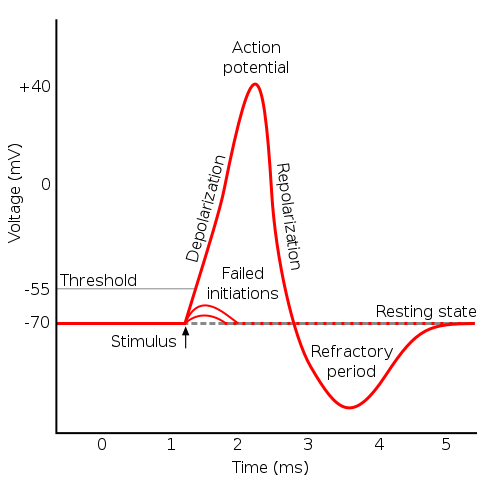

**a)** Describe depolarisation and hyperpolarisation. What would happen to the firing rate of a neuron in depolarisation and hyperpolarisation?

    Answer: 

We will now rerun the simulation from the previous exercise. This time, however, we will inject K+ and see how this impacts the membrane potential. The injection happens at time step 1000 and ends at 1050. Slowly move the slider to see how the potential evolves in time (third plot). Note, again, the dimensionless scales - but see how the curve spikes when we are injecting K+.

In [6]:
scenario3 = Scenario3()
slider = widgets.interact(scenario3.plot,timepoint=widgets.IntSlider(
    description='Timepoint', min=0, max=2000, step=1))

interactive(children=(IntSlider(value=0, description='Timepoint', max=2000), Output()), _dom_classes=('widget-…

We will again use the Goldman equation to get a true picture for how the membrane potential changes. Use the sliders below to perturb different ion concentrations and permeabilities for answering the questions below.

In [ ]:
slider = widgets.interact(
    ghk,
    p_Na=widgets.IntSlider(min=0, max=30., step=1., value=1.),
    p_K=widgets.IntSlider(min=0., max=30., step=1., value=20.),
    p_Cl=widgets.IntSlider(min=0., max=30., step=1., value=9.),
    c_out_Na=widgets.IntSlider(min=0., max=160., step=1., value=145.),
    c_in_Na=widgets.IntSlider(min=0., max=160., step=1., value=15.),
    c_out_K=widgets.IntSlider(min=0., max=160., step=1., value=4.),
    c_in_K=widgets.IntSlider(min=0., max=160., step=1., value=140.),
    c_out_Cl=widgets.IntSlider(min=0., max=160., step=1., value=120.),
    c_in_Cl=widgets.IntSlider(min=0., max=160., step=1., value=7.)
)

**b)** What happens to the membrane potential when we are increasing the extracellular K+ concentration? What happens to the firing rate of the cell?

    Answer: 

**c)** Valium increases the permeability of chlorine. What happens to the cell firing rate when taking valium?

    Answer: 